Preprocessing Images to Train a Neural Network

In [11]:
# importing packages
import os
import random
import numpy as np

# plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets

In [3]:
Train_Dir = "horse-or-human"

print("FIles within current directory:",os.listdir())
print()
print("Files within",Train_Dir,"are: ",os.listdir(Train_Dir))
print()

FIles within current directory: ['C1_W4_Lab_2_image_data_preprocessing_with_validation.ipynb', 'C1_W4_Lab_3_compacted_images.ipynb', 'C1_W4_Lab_1_image_data_preprocessing_no_validation.ipynb', '.ipynb_checkpoints', 'Image_data_preprocessing_without_validation.ipynb', 'horse-or-human']

Files within horse-or-human are:  ['humans', 'horses']



In [13]:
# Directory with the training horses pictures
training_horse_dir = os.path.join(Train_Dir,"horses")
# Directory with the training humans pictures
training_human_dir = os.path.join(Train_Dir,"humans")

training_horses_names = os.listdir(training_horse_dir)
training_humans_names = os.listdir(training_human_dir)

In [14]:
# check the names
print("First 5 names of the training horses:",training_horses_names[0:5])
print()
print("First 5 names of the training humans:",training_humans_names[0:5])
print()

First 5 names of the training horses: ['horse36-4.png', 'horse20-3.png', 'horse33-7.png', 'horse41-1.png', 'horse39-5.png']

First 5 names of the training humans: ['human08-00.png', 'human08-11.png', 'human08-17.png', 'human17-12.png', 'human15-13.png']



In [15]:
print("total number of training horse images:",len(os.listdir(training_horse_dir)))
print()
print("total number of training human images:",len(os.listdir(training_human_dir)))
print()

total number of training horse images: 501

total number of training human images: 527



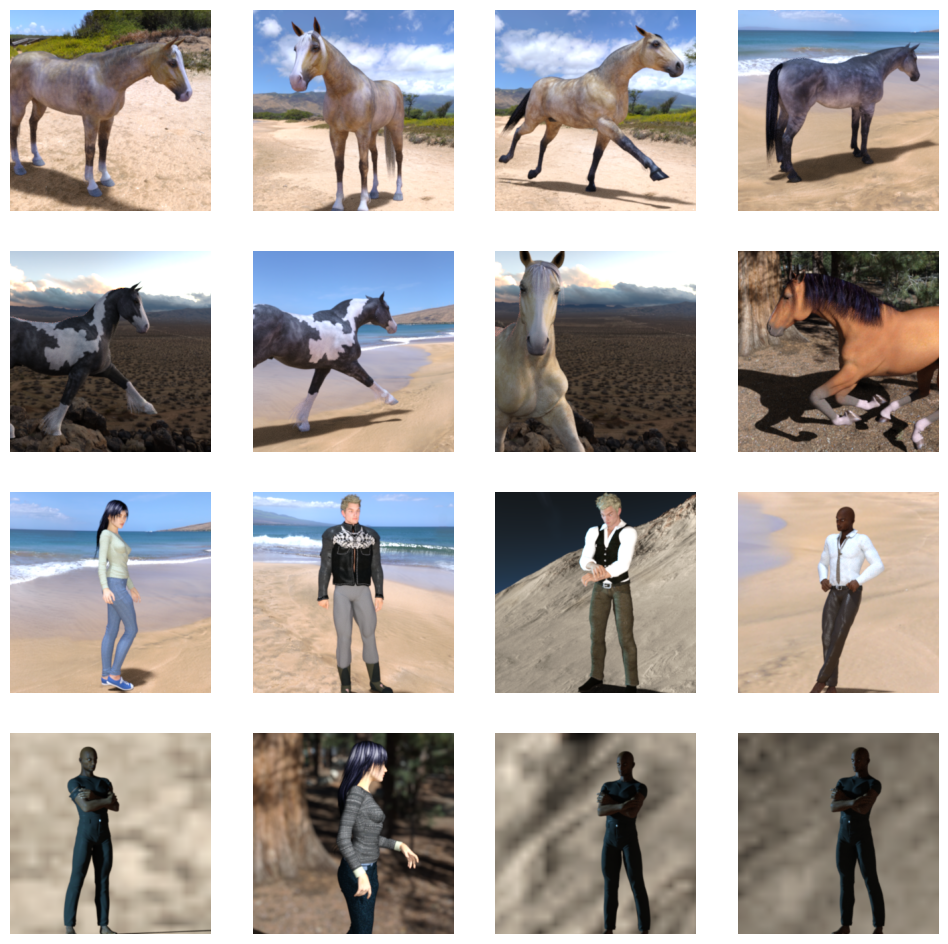

In [12]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(training_horse_dir, fname)
                for fname in random.sample(training_horses_names, k=8)]
next_human_pix = [os.path.join(training_human_dir, fname)
                for fname in random.sample(training_humans_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [17]:
# Building a small model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,300,3)),

    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

2024-10-11 21:58:54.712579: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [19]:
# Compiling the model

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

In [21]:
# initiating the training dataset

training_dataset = tf.keras.utils.image_dataset_from_directory(
    Train_Dir,
    image_size = (300,300),
    batch_size = 32,
    label_mode = 'binary'
)

training_dataset_type = type(training_dataset)
print("training_dataset is of type:",training_dataset_type)
print()

Found 1028 files belonging to 2 classes.
training_dataset is of type: <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>



In [24]:
# Getting one batch from the dataset
sample_batch = list(training_dataset.take(1))[0]

print("data type of sample batch:",type(sample_batch))
print("number of elements:",len(sample_batch))

image_batch = sample_batch[0]
label_batch = sample_batch[1]

print()
print("image_batch.shape:",image_batch.shape)
print("label_batch.shape:",label_batch.shape)
print()

2024-10-11 22:18:55.592844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1028]
	 [[{{node Placeholder/_4}}]]
2024-10-11 22:18:55.594625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1028]
	 [[{{node Placeholder/_4}}]]


data type of sample batch: <class 'tuple'>
number of elements: 2

image_batch.shape: (32, 300, 300, 3)
label_batch.shape: (32, 1)



In [28]:
# previewing the first image of first batch of images
print(image_batch[0].numpy())

[[[202. 221. 249.]
  [203. 222. 251.]
  [204. 223. 252.]
  ...
  [132. 183. 254.]
  [132. 183. 253.]
  [132. 183. 252.]]

 [[208. 226. 255.]
  [209. 227. 255.]
  [209. 227. 255.]
  ...
  [132. 183. 254.]
  [133. 183. 254.]
  [132. 183. 253.]]

 [[213. 230. 255.]
  [214. 231. 255.]
  [214. 231. 255.]
  ...
  [133. 184. 254.]
  [133. 184. 254.]
  [133. 184. 254.]]

 ...

 [[255. 228. 200.]
  [255. 228. 200.]
  [255. 230. 202.]
  ...
  [236. 205. 179.]
  [232. 201. 177.]
  [223. 192. 168.]]

 [[250. 221. 194.]
  [255. 223. 196.]
  [255. 228. 201.]
  ...
  [232. 200. 175.]
  [235. 205. 179.]
  [231. 200. 175.]]

 [[251. 221. 196.]
  [255. 226. 202.]
  [255. 232. 208.]
  ...
  [232. 201. 178.]
  [235. 205. 181.]
  [238. 208. 183.]]]


In [29]:
# min and max pixel value of image
print("min(image_batch[0]):",np.min(image_batch[0].numpy()))
print("max(image_batch[0]):",np.max(image_batch[0].numpy()))
print()

min(image_batch[0]): 1.0
max(image_batch[0]): 255.0



In [30]:
rescale_layer = tf.keras.layers.Rescaling(scale = .1/255)

In [31]:
image_rescaled = rescale_layer(image_batch[0].numpy())
print("image_rescaled:",image_rescaled.numpy())

image_rescaled: [[[0.07921568 0.08666667 0.09764706]
  [0.07960784 0.08705882 0.09843137]
  [0.08       0.08745098 0.09882353]
  ...
  [0.0517647  0.07176471 0.09960784]
  [0.0517647  0.07176471 0.09921569]
  [0.0517647  0.07176471 0.09882353]]

 [[0.08156863 0.08862745 0.1       ]
  [0.08196078 0.0890196  0.1       ]
  [0.08196078 0.0890196  0.1       ]
  ...
  [0.0517647  0.07176471 0.09960784]
  [0.05215686 0.07176471 0.09960784]
  [0.0517647  0.07176471 0.09921569]]

 [[0.08352941 0.09019608 0.1       ]
  [0.08392157 0.09058823 0.1       ]
  [0.08392157 0.09058823 0.1       ]
  ...
  [0.05215686 0.07215686 0.09960784]
  [0.05215686 0.07215686 0.09960784]
  [0.05215686 0.07215686 0.09960784]]

 ...

 [[0.1        0.08941177 0.07843137]
  [0.1        0.08941177 0.07843137]
  [0.1        0.09019608 0.07921568]
  ...
  [0.09254902 0.08039215 0.07019608]
  [0.09098039 0.07882353 0.06941176]
  [0.08745098 0.07529411 0.06588235]]

 [[0.09803922 0.08666667 0.07607843]
  [0.1        0.08745

In [32]:
print("min(image_rescaled):",np.min(image_rescaled))
print("max(image_rescaled):",np.max(image_rescaled))

min(image_rescaled): 0.00039215686
max(image_rescaled): 0.1


In [34]:
# defining a function to rescale training images
def rescale_image(image,label):
    return (rescale_layer(image),label)
training_dataset_scaled = training_dataset.map(rescale_image)

In [36]:
shuffle_buffer_size = 1000
prefetch_buffer_size = tf.data.AUTOTUNE

training_dataset_final = (training_dataset_scaled.cache()
                         .shuffle(shuffle_buffer_size)
                         .prefetch(prefetch_buffer_size)
                         )

In [37]:
history = model.fit(training_dataset_final,epochs = 15,verbose = 2)

Epoch 1/15


2024-10-11 22:50:47.824100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1028]
	 [[{{node Placeholder/_0}}]]
2024-10-11 22:50:47.825912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1028]
	 [[{{node Placeholder/_4}}]]


33/33 - 77s - loss: 0.9638 - accuracy: 0.5039 - 77s/epoch - 2s/step
Epoch 2/15
33/33 - 76s - loss: 0.6937 - accuracy: 0.5126 - 76s/epoch - 2s/step
Epoch 3/15
33/33 - 76s - loss: 0.6931 - accuracy: 0.5126 - 76s/epoch - 2s/step
Epoch 4/15
33/33 - 79s - loss: 0.6931 - accuracy: 0.5126 - 79s/epoch - 2s/step
Epoch 5/15
33/33 - 74s - loss: 0.6935 - accuracy: 0.5126 - 74s/epoch - 2s/step
Epoch 6/15
33/33 - 79s - loss: 0.6933 - accuracy: 0.5126 - 79s/epoch - 2s/step
Epoch 7/15
33/33 - 61s - loss: 0.6933 - accuracy: 0.5126 - 61s/epoch - 2s/step
Epoch 8/15
33/33 - 33s - loss: 0.6936 - accuracy: 0.5126 - 33s/epoch - 1s/step
Epoch 9/15
33/33 - 37s - loss: 0.6932 - accuracy: 0.5126 - 37s/epoch - 1s/step
Epoch 10/15
33/33 - 38s - loss: 0.6934 - accuracy: 0.5126 - 38s/epoch - 1s/step
Epoch 11/15
33/33 - 36s - loss: 0.6933 - accuracy: 0.5126 - 36s/epoch - 1s/step
Epoch 12/15
33/33 - 37s - loss: 0.6934 - accuracy: 0.5126 - 37s/epoch - 1s/step
Epoch 13/15
33/33 - 36s - loss: 0.6931 - accuracy: 0.5126 - 

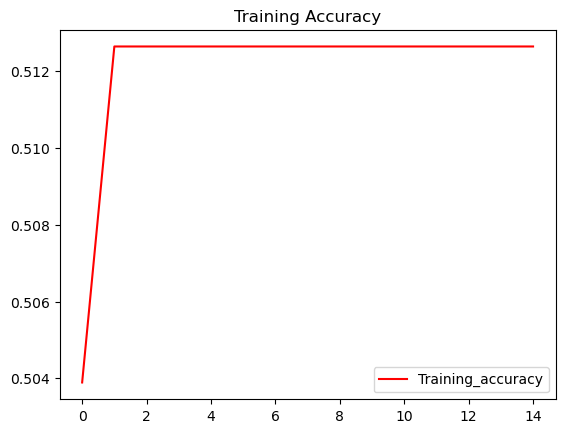

In [43]:
# Plotting the training accuracy for each epoch

acc = history.history['accuracy']
epoch = range(len(acc))

plt.plot(epoch,acc,'r',label='Training_accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.show()

Model Prediction !

In [52]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

/tmp/ipykernel_6756/1326648655.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


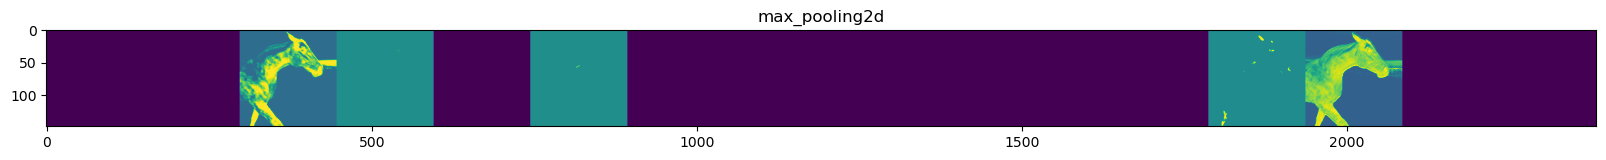

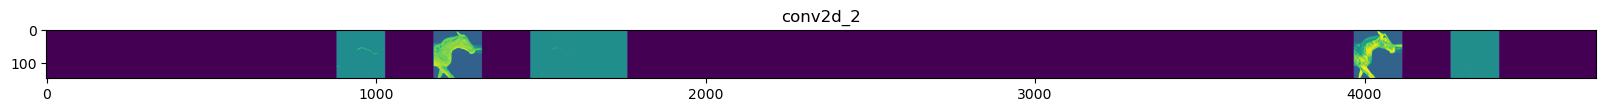

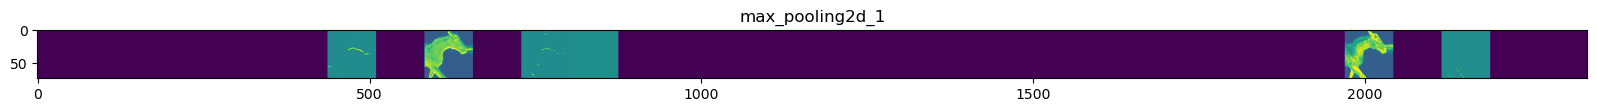

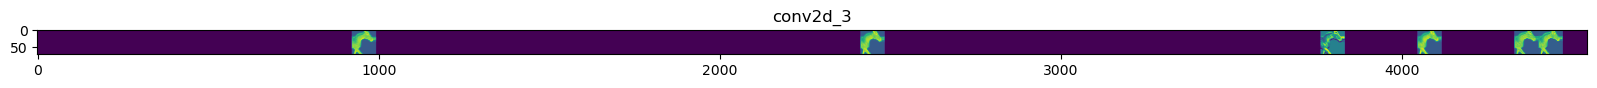

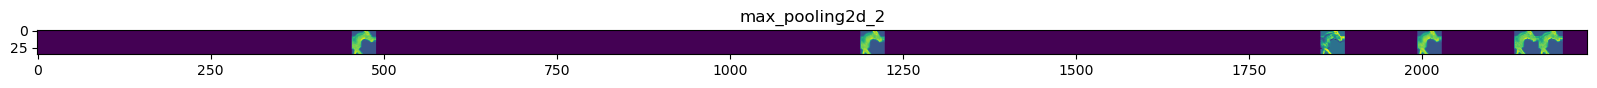

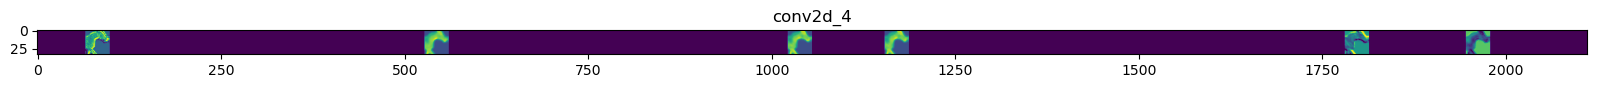

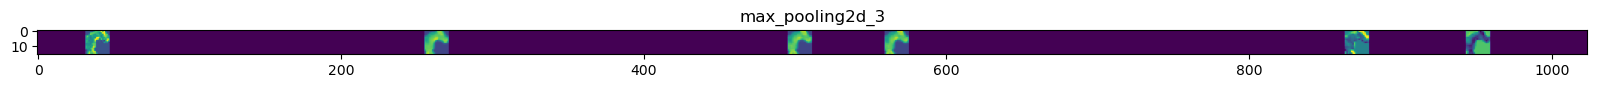

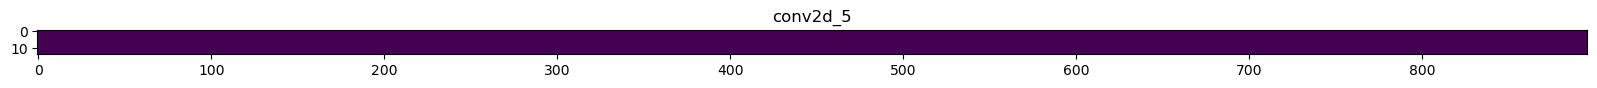

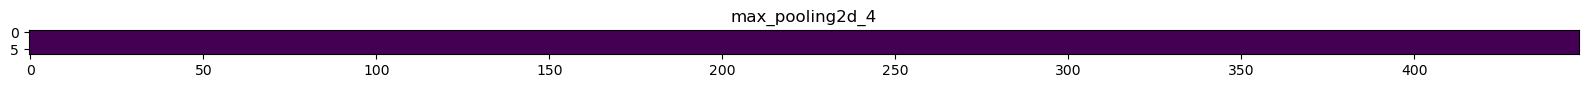

In [51]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(training_horse_dir, f) for f in training_horses_names]
human_img_files = [os.path.join(training_human_dir, f) for f in training_humans_names]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')